<a href="https://colab.research.google.com/github/csong202/csi4106_lectures/blob/main/slides_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model evaluation

CSI 4106 - Fall 2024

Marcel Turcotte  
Version: Sep 24, 2024 21:04

# Preamble

## Quote of Day

<https://youtu.be/hubWIuuz-e4>

[2024 Waymo Safety Impact Report](https://waymo.com/safety/impact) was
published on 2024-09-05. Waymo is a subsidiary of Alphabet inc.,
Google’s parent company. It operates robotaxi services in 4 US cities.

## Learning objectives

-   **Clarify** the concepts of **underfitting** and **overfitting** in
    machine learning.
-   **Describe** the primary metrics used to evaluate model performance.
-   **Contrast** micro- and macro-averaged performance metrics.

# Model fitting

## Model fitting

![](attachment:slides_files/figure-ipynb/cell-2-output-1.png)

During our class discussions, we have touched upon the concepts of
**underfitting** and **overfitting**. To delve deeper into these topics,
let’s examine them in the context of **polynomial regression**.

In [1]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

NameError: name 'X' is not defined

This example was meant to illustrate that, in practice, we often have
limited knowledge about the underlying model that generated the data.

## Generating a nonlinear dataset

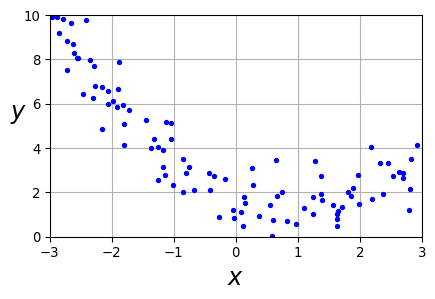

In [ ]:
import numpy as np
np.random.seed(42)

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X ** 2 - X + 2 + np.random.randn(100, 1)

**Attribution**: Géron (2022), 4

In machine learning experiments, specifying the seed of the random
number generator is crucial for ensuring reproducibility. By setting a
fixed seed, programmers can guarantee that the same sequence of random
numbers will be generated each time the experiment is run. This
consistency is vital for several reasons:

1.  **Reproducibility**: It allows other programmers to replicate the
    experiment with the exact same conditions, facilitating verification
    and validation of results.
2.  **Comparative Analysis**: It enables consistent comparison between
    different models or algorithms under the same initial conditions,
    ensuring that observed differences are due to the models themselves
    rather than variations in the random initialization.
3.  **Debugging**: It aids in debugging by providing a stable
    environment where issues can be consistently reproduced and
    investigated.

## Linear regression

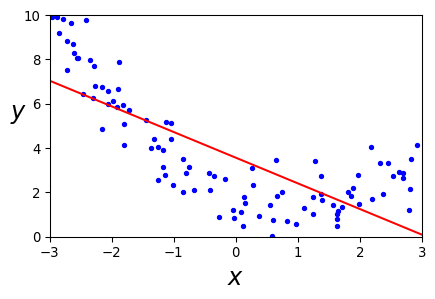

A linear model inadequately represents this dataset

## Definition

**Feature engineering** is the process of **creating**,
**transforming**, and **selecting** variables (attributes) from raw data
to improve the performance of machine learning models.

Here, our focus is on **creating** new attributes from raw data.

## `PolynomialFeatures`

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

. . .

In [ ]:
X[0]

array([-0.75275929])

. . .

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

. . .

> **
> [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)**
>
> Generate a new feature matrix consisting of all polynomial
> combinations of the features with degree less than or equal to the
> specified degree. For example, if an input sample is two dimensional
> and of the form $[a, b]$, the degree-2 polynomial features are
> $[1, a, b, a^2, ab, b^2]$.

## `PolynomialFeatures`

Given two features $a$ and $b$, `PolynomialFeatures` with `degree=3`
would add $a^2$, $a^3$, $b^2$, $b^3$, as well as, $ab$, $a^2b$, $ab^2$!

. . .

> **Warning**
>
> `PolynomialFeatures(degree=d)` adds $\frac{(D+d)!}{d!D!}$ features,
> where $D$ is the original number of features.

Additionally, you have the option to engineer new features of your own.

## Polynomial regression

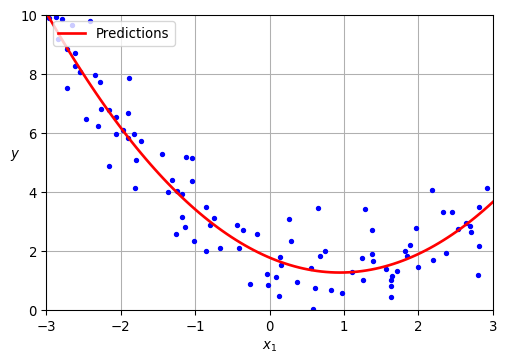

`LinearRegression` on `PolynomialFeatures`

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

## Polynomial regression

![](attachment:slides_files/figure-ipynb/cell-13-output-1.png)

The data was generated according to the following equation, with the
inclusion of Gaussian noise.

$$
  y = 0.5 x^2 + 1.0 x + 2.0
$$

Presented below is the learned model.

$$
  \hat{y} = 0.56 x^2 + (-1.06) x + 1.78
$$

In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([[-1.06633107,  0.56456263]]), array([1.78134581]))

Given the noise present in our dataset, akin to what we would expect
with real-world data, this model demonstrates a good fit.

## Overfitting and underfitting

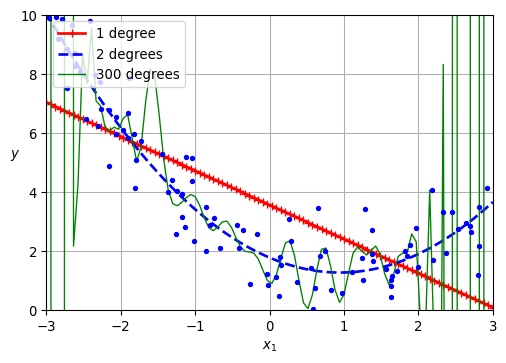

A **low loss value** on the **training set** does not necessarily
indicate a “better” model.

**Attribution**:
[04_training_linear_models.ipynb](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb)

In this example, the linear regression model is **underfitting** the
training data, as indicated by its high mean squared error (loss) on the
training set (red line). This suggests that the model makes numerous
errors even on the training data.

Conversely, the polynomial model with degree=300 is **overfitting** the
training data. It exhibits a low mean squared error (loss) on the
training set (green line), implying that it makes few errors on the
training data.

However, the degree=300 polynomial model is likely to perform poorly on
future predictions. The green curve extends beyond the boundaries of the
image on the y-axis. For instance, for input values in the range of 2 to
3, the model predicts values exceeding 10 (as well as negative values),
whereas the expected values should lie within the range of 2 to 4.

This illustrative example may seem simplistic since the data is
generated from a quadratic equation and involves only a single
attribute, making visualization straightforward. However, it serves to
highlight a key point relevant to more complex models, such as deep
neural networks. As the number of parameters increases, the model’s
capacity to fit the training data also increases, which can lead to
overfitting if not properly managed.

## Under- and over- fitting

-   **Underfitting:**
    -   Your model is **too simple** (here, linear).
    -   Uninformative features.
    -   **Poor** performance on both **training** and **test** data.
-   **Overfitting:**
    -   Your model is **too complex** (tall decision tree, deep and wide
        neural networks, etc.).
    -   **Too many features** given the number of examples available.
    -   **Excellent** performance on the **training set**, but **poor**
        performance on the **test set**.

In the case of underfitting, adding more data to the training set will
not help.

In the case of overfitting, adding more data would bring the train and
test set learning curves closer.

## Learning curves

-   One way to **assess our models** is to visualize the **learning
    curves**:
    -   A **learning curve** shows the performance of our model, here
        using RMSE, on both the **training set** and the **test set**.
    -   Multiple **measurements** are obtained by repeatedly training
        the model on larger and larger subsets of the data.

**See**:
[sklearn.model_selection.learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html).

## Learning curve – underfitting

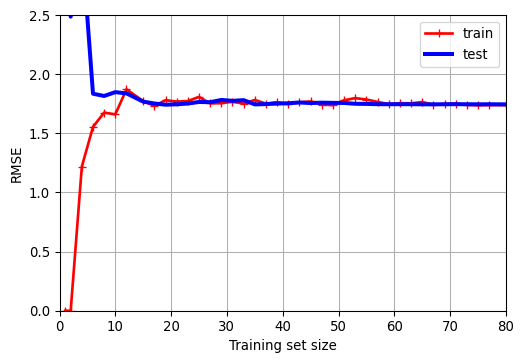

**Poor** performance on both **training** and **test** data.

**Source code**:
[04_training_linear_models.ipynb](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb).

This graph illustrates the learning curve for a linear regression model
applied to data generated from a quadratic equation, which serves as our
ongoing example.

The horizontal axis represents the size of the training set. Initially,
the linear regression model is trained on a very small dataset,
consisting of just one or a few examples, and the Root Mean Square Error
(RMSE) is plotted for both the training and test sets. The size of the
training set is then incrementally increased, a new model is trained,
and the performance is recorded. This procedure continues until the
entire dataset is utilized.

Key observations from the graph include:

-   With only one or two examples, the model perfectly fits the training
    set, resulting in low RMSE for the training data.

-   As the size of the training set increases, the model struggles to
    fit the training data due to the quadratic nature of the data
    generation process. Consequently, the RMSE for the training set
    rises and stabilizes at a higher level.

-   For small training sets, the model performs poorly on the test set
    due to inadequate generalization, resulting in high RMSE.

-   As the training set size grows, the test set performance improves,
    indicated by decreasing RMSE, until it reaches a point where further
    increases in training set size do not yield significant
    improvements.

These learning curves are indicative of a model that is underfitting.
Both the training and test set RMSE curves plateau at relatively high
values and remain close to each other, as noted by Géron (2022).

## Learning curve – overfitting

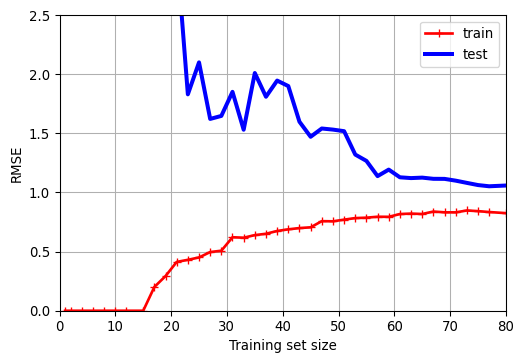

**Excellent** performance on the **training set**, but **poor**
performance on the **test set**.

Polynomial with **degree=14**.

-   For a training set of up to 14 data points, the polynomial fits the
    training data perfectly, resulting in an RMSE of zero.

-   The error on the **training data** in this instance is significantly
    lower.

-   A notable gap between the two curves indicates that the model
    performs substantially better on the training data compared to the
    test data.

## Overfitting - deep nets - loss

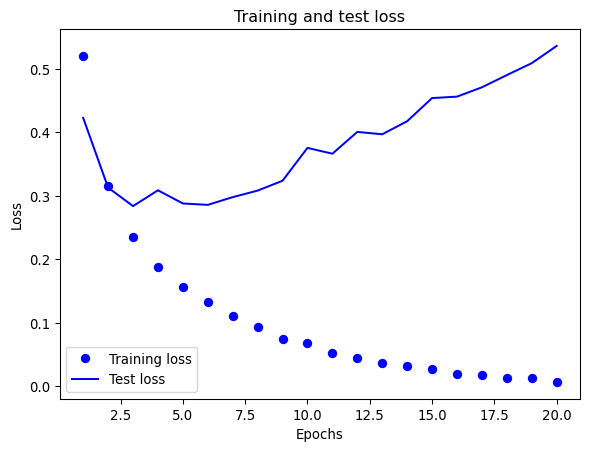

Example from Chollet (2017) Chapter 3
([chapter04_getting-started-with-neural-networks.ipynb](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb),
ipynb from 2021 edition).

Neural networks will be covered in detail later in our course. The graph
presented here illustrates the variation in the loss function as a deep
learning model undergoes training.

This example utilizes the [IMDB movie review sentiment classification
dataset available in Keras](https://keras.io/api/datasets/imdb/). The
dataset comprises 25,000 movie reviews from
[IMDB](https://www.imdb.com), each labeled with a sentiment (positive or
negative).

The model consists of three dense layers with sizes 16, 16, and 1,
respectively. It includes a total of 160,305 trainable parameters.

The network is trained using mini-batch stochastic gradient descent with
a batch size of 512. The horizontal axis represents the number of
epochs, where each epoch indicates that the model has seen the entire
training set once. During each epoch, the stochastic gradient descent
algorithm updates the model parameters iteratively using mini-batches of
512 examples.

I selected this example to illustrate that a neural network with with
sufficient capacity (number of parameters) can minimize training errors
almost to zero, as reducing training error is the primary objective of
optimization. However, the graph clearly demonstrates that beyond a
certain point, the learned patterns become specific to the training set
rather than general principles. Generalization, rather than mere
memorization, is the ultimate goal of machine learning.

Overfitting occurs when a model learns the details and noise in the
training data to an extent that it negatively impacts the model’s
performance on new data. This can result in a decision boundary that
fits the training data too tightly, capturing noise and irrelevant
details rather than general patterns.

## Overfitting - deep nets - accuracy

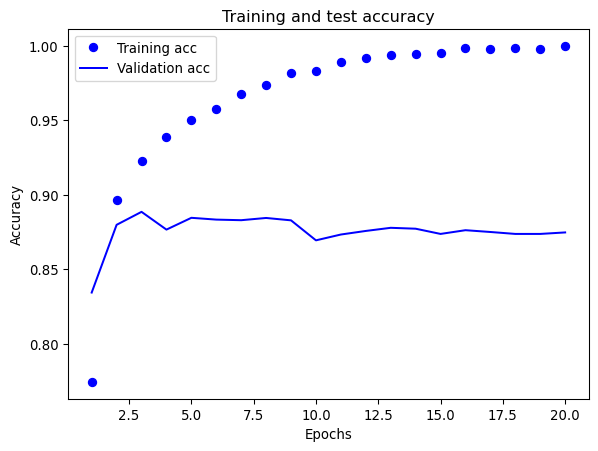

This graph similarly illustrates the variation in accuracy for both the
training and test sets as the model undergoes training.

## Bias/Variance Tradeoff

-   **Bias**:
    -   Error from overly simplistic models
    -   High bias can lead to underfitting
-   **Variance**:
    -   Error from overly complex models
    -   Sensitivity to fluctuations in the training data
    -   High variance can lead to overfitting
-   **Tradeoff**:
    -   Aim for a model that generalizes well to new data
    -   Methods: cross-validation, regularization, ensemble learning

Hastie, Tibshirani, and Friedman (2009)

## Related videos

<https://youtu.be/tUs0fFo7ki8>

Other videos include:

-   [Bias and Variance, StatQuest](https://youtu.be/EuBBz3bI-aA) (great
    visual summary)
-   [Bias/Variance (C2W1L02), Stanford, Andrew
    Ng](https://youtu.be/SjQyLhQIXSM)
-   [Intuition behind bias and variance, Sebastian
    Raschka](https://youtu.be/DCk-p6MsiWA)

# Performance metrics

## Confusion matrix

|                           | **Positive** (**Predicted**) | **Negative** (**Predicted**) |
|------------------------|------------------------|------------------------|
| **Positive** (**Actual**) | True positive (TP)           | False negative (FN)          |
| **Negative** (**Actual**) | False positive (FP)          | True negative (TN)           |

A **confusion matrix** is a table summarizing the performance of a
classification algorithm (here for a binary classification task).

-   In statistical analysis, **False Positives (FP)** are commonly
    referred to as **Type I errors**, and **False Negatives (FN)** are
    known as **Type II errors**.

-   The **confusion matrix** encapsulates all essential information
    required to assess the performance of a classification model.

-   While the confusion matrix provides a comprehensive view, more
    **concise metrics** such as **accuracy**, **precision**, **recall**,
    and the **F$_1$ score** are often more intuitive and practical for
    summarizing model performance.

## sklearn.metrics.confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

confusion_matrix(y_actual,y_pred)

array([[1, 2],
       [3, 4]])

. . .

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
(tn, fp, fn, tp)

(1, 2, 3, 4)

## Perfect prediction

In [ ]:
y_actual = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
y_pred   = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]

confusion_matrix(y_actual,y_pred)

array([[4, 0],
       [0, 6]])

. . .

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
(tn, fp, fn, tp)

(4, 0, 0, 6)

## Confusion matrix - multiple classes

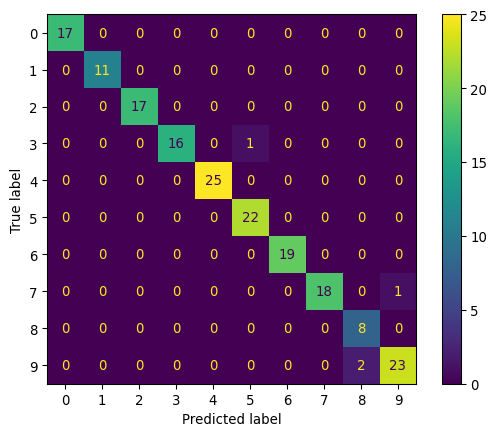

**Confusion matrix** for the **digits example** presented in the
previous lecture.

The image displays a heatmap of the confusion matrix for the digit
classification task. This task, a multiclass classification problem, was
addressed using `OneVsRestClassifier` and `LogisticRegression`.

The confusion matrix summarizes the predictions made on the test set,
which is a subset of the data that was neither used for training nor for
preprocessing with `StandardScaler`.

The confusion matrix encapsulates all the results from applying the
classifier to the test set. However, to summarize this information more
succinctly, we often refer to performance metrics.

## Source code

In [ ]:
import numpy as np
np.random.seed(42)

from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression())

clf = clf.fit(X_train, y_train)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

X_test = scaler.transform(X_test)
y_pred = clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

## Visualizing errors

In [ ]:
mask = (y_test == 9) & (y_pred == 8)

X_9_as_8 = X_test[mask]

y_9_as_8 = y_test[mask]

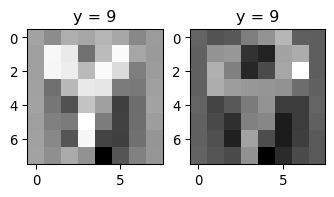

In the confusion matrix on the previous screen, we had seen that there
were examples for which the true label was 9, but the prediction was was
8. We can visualize the examples to see if we understand the nature of
those errors.

## Confusion matrix - multiple classes

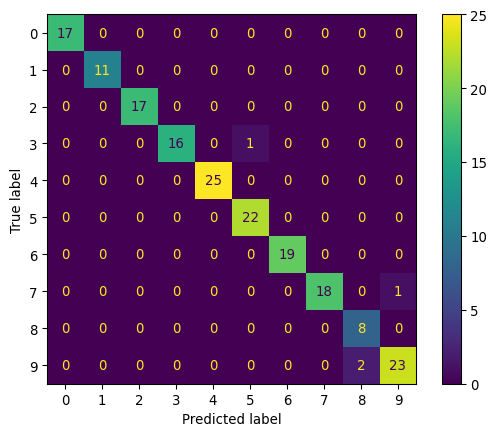

It is often preferable to summarize the classifier’s performance with a
single metric.

## Accuracy

How **accurate** is this result?

$$
  \mathrm{accuracy} = \frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{TP}+\mathrm{TN}+\mathrm{FP}+\mathrm{FN}} = \frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{N}}
$$

In [ ]:
from sklearn.metrics import accuracy_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

accuracy_score(y_actual,y_pred)

0.5

**Accuracy** is the ratio of correctly predicted instances to the total
number of predictions.

## Accuracy

In [ ]:
y_actual = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
y_pred   = [1, 0, 1, 1, 0, 0, 0, 1, 0, 0]

accuracy_score(y_actual,y_pred)

0.0

In [ ]:
y_actual = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
y_pred   = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]

accuracy_score(y_actual,y_pred)

1.0

**Accuracy** is a number between 0 (all wrong) and 1 (perfect).

## Accuracy can be misleading

In [ ]:
y_actual = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
y_pred   = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

accuracy_score(y_actual,y_pred)

0.8

**Why** is it problematic?

Accuracy can be misleading in the context of **class imbalance**, as it
disproportionately reflects the performance on the majority class,
thereby masking poor performance on the minority class.

As **class imbalance increases**, the accuracy metric becomes
**increasingly misleading**.

## Precision

AKA, **positive predictive value** (PPV).

$$
  \mathrm{precision} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}
$$

In [ ]:
from sklearn.metrics import precision_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

precision_score(y_actual, y_pred)

0.6666666666666666

**Precision** is the proportion of **true positive predictions** among
**all positive predictions**.

## Precision alone is not enough

In [ ]:
y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

precision_score(y_actual,y_pred)

1.0

An algorithm that makes a small number of high-confidence predictions
might achieve a high precision score, but this may not necessarily be
useful.

## Recall

AKA **sensitivity** or **true positive rate** (TPR) $$
  \mathrm{recall} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}
$$

In [ ]:
from sklearn.metrics import recall_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

recall_score(y_actual,y_pred)

0.5714285714285714

**Recall** is the proportion of true positive instances correctly
identified among all actual positive instances.

## F$_1$ score

$$
\begin{align*}
  F_1~\mathrm{score} &= \frac{2}{\frac{1}{\mathrm{precision}}+\frac{1}{\mathrm{recall}}} = 2 \times \frac{\mathrm{precision}\times\mathrm{recall}}{\mathrm{precision}+\mathrm{recall}} \\
                     &= \frac{\mathrm{TP}}{\mathrm{FP}+\frac{\mathrm{FN}+\mathrm{FP}}{2}}
\end{align*}
$$

In [ ]:
from sklearn.metrics import f1_score

y_actual = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred   = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

f1_score(y_actual,y_pred)

0.6153846153846154

**F$_1$** is the **harmonic mean** of precision and recall.

-   The harmonic mean places greater emphasis on lower values, while the
    arithmetic mean treats all values equally.
-   Using the harmonic mean ensures that a high score is only achieved
    when both precision and recall are high, thus providing a more
    holistic measure of a classifier’s performance in scenarios with
    imbalanced datasets.
-   The F$_1$ score favors classifiers that achieve a balance between
    precision and recall.
-   Increasing **recall** often results in a decrease in **precision**,
    and vice versa. This phenomenon is known as the **precision/recall
    trade-off**.

## Micro Performance Metrics

Micro performance metrics **aggregate the contributions of all classes
to compute the average performance metric**, such as precision, recall,
or F1 score. This approach **treats each individual prediction
equally**, providing a balanced evaluation by emphasizing the
performance on frequent classes.

## Macro Performance Metrics

Macro performance metrics **compute the performance metric independently
for each class and then average these metrics**. This approach **treats
each class equally**, regardless of its frequency, providing an
evaluation that equally considers performance across both frequent and
infrequent classes.

## Micro/macro metrics

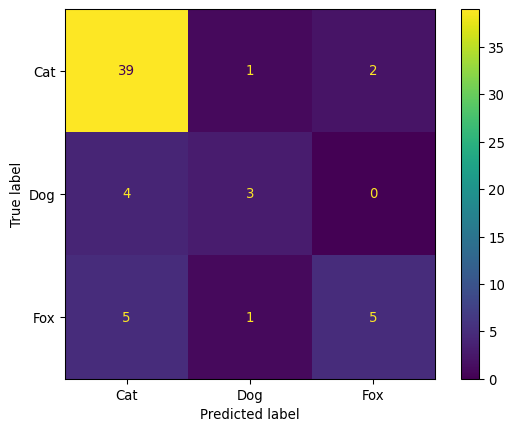

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Sample data
y_true = ['Cat'] * 42 + ['Dog'] *  7 + ['Fox'] * 11
y_pred = ['Cat'] * 39 + ['Dog'] *  1 + ['Fox'] *  2 + \
         ['Cat'] *  4 + ['Dog'] *  3 + ['Fox'] *  0 + \
         ['Cat'] *  5 + ['Dog'] *  1 + ['Fox'] *  5

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

The dataset can be conceptualized as resulting from an **image
classification task**, involving images of **cats**, **dogs**, and
**foxes**. Reflecting common trends observed on the internet, images of
cats are disproportionately represented, leading to a **class
imbalance** issue.

## Micro/macro precision

In [ ]:
from sklearn.metrics import classification_report, precision_score

print(classification_report(y_true, y_pred), "\n")

print("Micro precision: {:.2f}".format(precision_score(y_true, y_pred, average='micro')))
print("Macro precision: {:.2f}".format(precision_score(y_true, y_pred, average='macro')))

              precision    recall  f1-score   support

         Cat       0.81      0.93      0.87        42
         Dog       0.60      0.43      0.50         7
         Fox       0.71      0.45      0.56        11

    accuracy                           0.78        60
   macro avg       0.71      0.60      0.64        60
weighted avg       0.77      0.78      0.77        60
 

Micro precision: 0.78
Macro precision: 0.71

**Macro-average precision** is calculated as the mean of the
**precision** scores for each class:
$\frac{0.81 + 0.60 + 0.71}{3} = 0.71$.

Whereas, the **micro-average precision** is calculated using the
formala, $\frac{TP}{TP+FP}$ and the **data from the entire confusion
matrix** $\frac{39+3+5}{39+3+5+9+2+2} = \frac{47}{60} = 0.78$

The high micro-average precision observed here is primarily due to the
high precision and large number of examples in the majority class, Cat.
This masks the classifier’s relatively poor performance on the minority
classes, Dog and Fox.

In a balanced dataset, both micro-average and macro-average metrics
yield similar scores.

However, in an imbalanced dataset, significant disparities in classifier
performance between the majority and minority classes will result in
divergent micro-average and macro-average scores. Specifically, the
classifier tends to underperform on the minority class(es), leading to
these discrepancies.

In **macro-average metrics**, each class contributes equally to the
final metric calculation, **irrespective of the number of examples it
contains**. This means that the performance metric for each class are
computed independently and then averaged, without considering the
proportion of instances that each class represents in the dataset.
Consequently, macro-averaging ensures that **each class has an equal
impact on the overall metric**, which can be particularly useful in
cases where the class distribution is imbalanced.

## Micro/macro recall

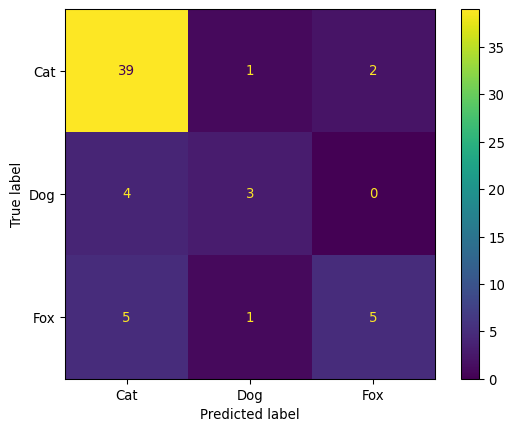

              precision    recall  f1-score   support

         Cat       0.81      0.93      0.87        42
         Dog       0.60      0.43      0.50         7
         Fox       0.71      0.45      0.56        11

    accuracy                           0.78        60
   macro avg       0.71      0.60      0.64        60
weighted avg       0.77      0.78      0.77        60
 

Micro recall: 0.78
Macro recall: 0.60

**Macro-average** recall is calculated as the **mean of the recall
scores for each class**: $\frac{0.93 + 0.43 + 0.45}{3} = 0.60$.

Whereas, the **micro-average** recall is calculated using the formala,
$\frac{TP}{TP+FN}$ and the **data from the entire confusion matrix**
$\frac{39+3+5}{39+3+5+3+4+6} = \frac{39}{60} = 0.78$

## Micro/macro metrics (medical data)

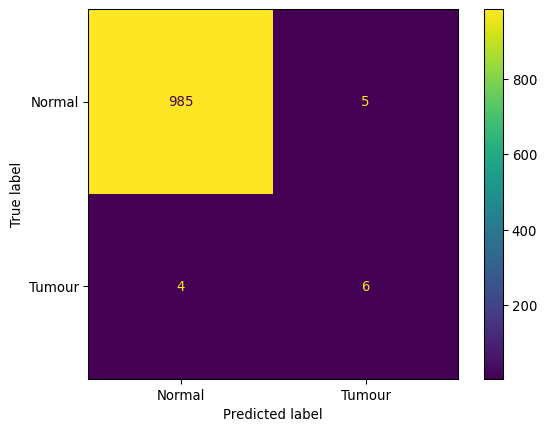

Consider a medical dataset, such as those involving diagnostic tests or
imaging, comprising 990 normal samples and 10 abnormal (tumor) samples.
This represents the ground truth.

## Micro/macro metrics (medical data)

              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00       990
      Tumour       0.55      0.60      0.57        10

    accuracy                           0.99      1000
   macro avg       0.77      0.80      0.78      1000
weighted avg       0.99      0.99      0.99      1000
 

Micro precision: 0.99
Macro precision: 0.77


Micro recall: 0.99
Macro recall: 0.80

## Hand-written digits (revisited)

Loading the dataset

In [ ]:
import numpy as np
np.random.seed(42)

from sklearn.datasets import fetch_openml

digits = fetch_openml('mnist_784', as_frame=False)
X, y = digits.data, digits.target

Plotting the first five examples

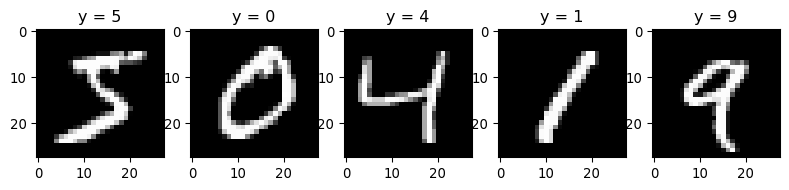

These images have dimensions of ( 28 ) pixels.

## Creating a binary classification task

In [ ]:
# Creating a binary classification task (one vs the rest)

some_digit = X[0]
some_digit_y = y[0]

y = (y == some_digit_y)
y

array([ True, False, False, ..., False,  True, False])

. . .

In [ ]:
# Creating the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## `SGDClassifier`

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)

clf.predict(X[0:5]) # small sanity check

array([ True, False, False, False, False])

The `SGDClassifier` is a linear classifier that utilizes stochastic
gradient descent (SGD) for training. Compared to `LogisticRegression`,
it can offer faster training times, particularly for large datasets.
Additionally, `SGDClassifier` allows for the adjustment of the decision
threshold in subsequent examples.

## Performance

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9572857142857143

Wow!

## Not so fast

. . .

In [ ]:
y_pred = dummy_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.906

The
[DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
in scikit-learn generates predictions without considering the input
features. By default, it consistently predicts the most frequent class
label in the training data. It is a simple baseline classifier.

Why is the accuracy so high despite this classifier ignoring the input
data?

The high accuracy is attributed to the class distribution within the
dataset. Approximately 10% of the samples correspond to the digit ‘5’,
which is the positive class in our binary classification task.
Consequently, about 90% of the samples are ‘not 5’ and belong to the
negative class. Since the DummyClassifier always predicts the majority
class, its accuracy is expected to be around 90%.

This underscores the point that accuracy is often not the best metric,
particularly when dealing with imbalanced datasets.

## Precision-recall trade-off

![](attachment:../../assets/images/geron_2022-f3_4.png)

**Attribution**: Géron (2022) Figure 3.4

## Precision-recall trade-off

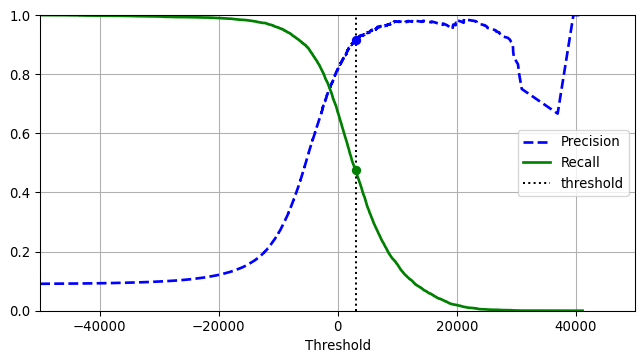

I have used `SGDClassifier` because it allows to vary the decision
treshold (boundary) to produce a plot illustrating the precision-recall
tradeoff.

As the decision threshold decreases, a higher number of examples are
predicted as positive, potentially leading the classifier to eventually
label all instances as positive.

Conversely, as the decision threshold increases, fewer examples are
classified as positive, which may result in the classifier predicting no
positive instances at all.

For certain applications, a classifier with high precision is essential.
For example, consider a scenario where each prediction necessitates a
costly laboratory experiment to verify its accuracy, such as in a
pharmaceutical company aiming to discover new drugs. Here, the
classifier predicts whether a compound is active. Given the high cost of
experiments to validate candidates, the company would prioritize
focusing on the most promising compounds first.

In contrast, consider a scenario involving cancer screening, such as
using mammograms to detect breast cancer. In this case, it may be
preferable to lower the decision threshold, thereby increasing the
number of false-positive predictions. Although this approach results in
more patients undergoing additional tests, such as biopsies, it can
potentially save more lives by ensuring that fewer cases of cancer go
undetected.

## Precision/Recall curve

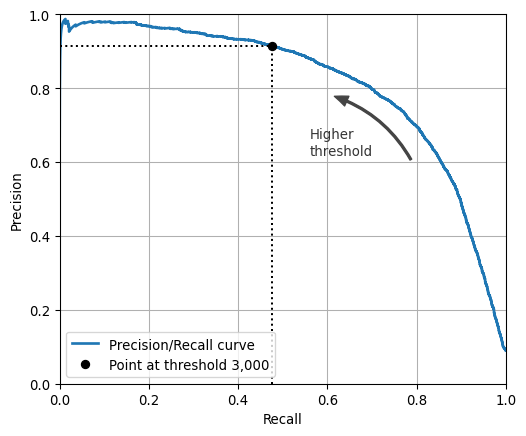

## ROC curve

**Receiver Operating Characteristics (ROC) curve**

-   **True positive rate** (TPR) against **false positive rate** (FPR)
-   An ideal classifier has **TPR** close to **1.0** and **FPR** close
    to **0.0**
-   $\mathrm{TPR} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$
    (recall, sensitivity)
-   **TPR** approaches **one** when the number of **false negative**
    predictions is low
-   $\mathrm{FPR} = \frac{\mathrm{FP}}{\mathrm{FP}+\mathrm{TN}}$
    (aka~\[1-specificity\])
-   **FPR** approaches **zero** when the number of **false positive** is
    low

ROC (Receiver Operating Characteristic) curves are popular in machine
learning and statistics for several reasons:

1.  **Comprehensive Performance Evaluation**: ROC curves provide a
    visual representation of a classifier’s performance across all
    possible thresholds. By plotting the True Positive Rate (TPR)
    against the False Positive Rate (FPR), it allows practitioners to
    evaluate the trade-off between sensitivity (recall) and specificity.
2.  **Threshold Independence**: Unlike metrics like accuracy, ROC curves
    evaluate classifier performance without relying on a specific
    decision threshold. This makes them particularly useful in comparing
    models across varying thresholds.
3.  **Handling Imbalanced Datasets**: For datasets with class imbalances
    (where one class is much more frequent than the other), ROC curves
    are more informative than accuracy, which can be misleading. The
    curve captures the model’s ability to distinguish between classes
    irrespective of their distribution.
4.  **Area Under the Curve (AUC)**: The Area Under the ROC Curve (AUC)
    provides a single value summary of the model’s performance. AUC-ROC
    is often used as a benchmark metric to compare different models,
    with values ranging from 0.5 (random guessing) to 1.0 (perfect
    classification).
5.  **Broad Applicability**: ROC curves can be used for any binary
    classification task and are easily extended to multiclass problems
    using techniques like one-vs-rest classification, making them
    versatile in evaluating classifiers.

Overall, their ability to offer a broad, threshold-independent view of
model performance, especially in imbalanced scenarios, makes ROC curves
a popular choice for evaluating classifiers.

## ROC curve

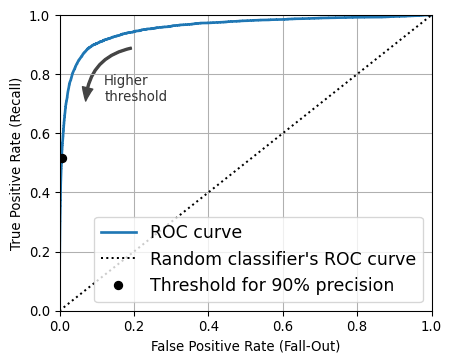

**Attribution:**
[03_classification.ipynb](https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb)

It is common to measure the area under the curve, represented as AUC.
Specifically, the area under the ROC curve. This allows to compare

## AUC/ROC

![](attachment:../../assets/images/zhou_et_al_2019_roc.png)

Zhou, Y.-H. & Gallins, P. A Review and Tutorial of Machine Learning
Methods for Microbiome Host Trait Prediction. *Front Genet* **10**, 579
(2019).

## The 7 steps of machine learning

<https://youtu.be/nKW8Ndu7Mjw>

## Prologue

## Further reading

![](attachment:../../assets/images/evaluating_learning_algorithms.jpg)

Japkowicz and Shah (2011)

This book, which examines various aspects of the evaluation process with
an emphasis on classification algorithms, has excellent ratings on
Amazon!

[Nathalie Japkowicz](https://www.american.edu/cas/faculty/japkowic.cfm)
was formely a professor that the University of Ottawa. She now works at
the American University in Washington.

[Mohak Shah](http://www.mohakshah.com) completed his PhD at the
University of Ottawa. He has held several positions in the industry,
including AI and Machine Learning Vice President for LG Electronics.

## Next lecture

-   We will examine cross-validation and hyperparameter tuning.

## References

Chollet, François. 2017. *Deep Learning with Python*. Manning
Publications.

Géron, Aurélien. 2022. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 3rd ed. O’Reilly Media, Inc.

Hastie, Trevor, Robert Tibshirani, and Jerome H. Friedman. 2009. *The
Elements of Statistical Learning: Data Mining, Inference, and
Prediction, 2nd Edition*. Springer Series in Statistics. Springer.
<https://doi.org/10.1007/978-0-387-84858-7>.

Japkowicz, Nathalie, and Mohak Shah. 2011. *Evaluating Learning
Algorithms: A Classification Perspective*. Cambridge: Cambridge
University Press.
<http://assets.cambridge.org/97805211/96000/cover/9780521196000.jpg>.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa